In [1]:
import tensorflow as tf
from models import PoissonPinn
from utils import plot_poisson_model, simulate_poisson
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 4

def u(x):
  return tf.sin(np.pi * a * x)

def u_xx(x): # rhs function
  return -(np.pi * a)**2 * tf.sin(np.pi * a * x)

In [3]:
(x_eqn, rhs_eqn), (x_bnd, u_bnd) = simulate_poisson(1000, u_xx, u)

2022-10-30 00:01:44.023531: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 00:01:44.077182: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 00:01:44.077756: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 00:01:44.078655: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [4]:
network = PoissonPinn.build_network([32, 64])

In [5]:
model = PoissonPinn(network)

In [6]:
model.compile()

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [8]:
history = model.fit(tf.stack([x_eqn, x_bnd], axis=0), tf.stack([rhs_eqn, u_bnd], axis=0), optimizer=optimizer, epochs=5000, progress_interval=100)

Epoch: 0 Loss: 13005.7998 Total Elapsed Time: 1.27
Epoch: 100 Loss: 12320.1045 Total Elapsed Time: 2.27
Epoch: 200 Loss: 10708.0674 Total Elapsed Time: 3.35
Epoch: 300 Loss: 414.7025 Total Elapsed Time: 4.51
Epoch: 400 Loss: 245.5899 Total Elapsed Time: 5.56
Epoch: 500 Loss: 170.7965 Total Elapsed Time: 6.80
Epoch: 600 Loss: 104.3715 Total Elapsed Time: 8.10
Epoch: 700 Loss: 41.1162 Total Elapsed Time: 9.32
Epoch: 800 Loss: 18.4684 Total Elapsed Time: 10.48
Epoch: 900 Loss: 9.0360 Total Elapsed Time: 11.63
Epoch: 1000 Loss: 4.5305 Total Elapsed Time: 12.92
Epoch: 1100 Loss: 2.0446 Total Elapsed Time: 14.06
Epoch: 1200 Loss: 0.9304 Total Elapsed Time: 15.23
Epoch: 1300 Loss: 0.4965 Total Elapsed Time: 16.31
Epoch: 1400 Loss: 0.3224 Total Elapsed Time: 17.48
Epoch: 1500 Loss: 0.2408 Total Elapsed Time: 18.77
Epoch: 1600 Loss: 0.1953 Total Elapsed Time: 19.83
Epoch: 1700 Loss: 0.1669 Total Elapsed Time: 21.04
Epoch: 1800 Loss: 0.1482 Total Elapsed Time: 22.20
Epoch: 1900 Loss: 0.1361 Tota

In [9]:
from utils import plot_training_loss

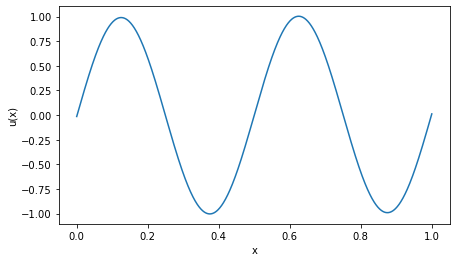

In [29]:
plot_poisson_model(model.network, 0, 1)

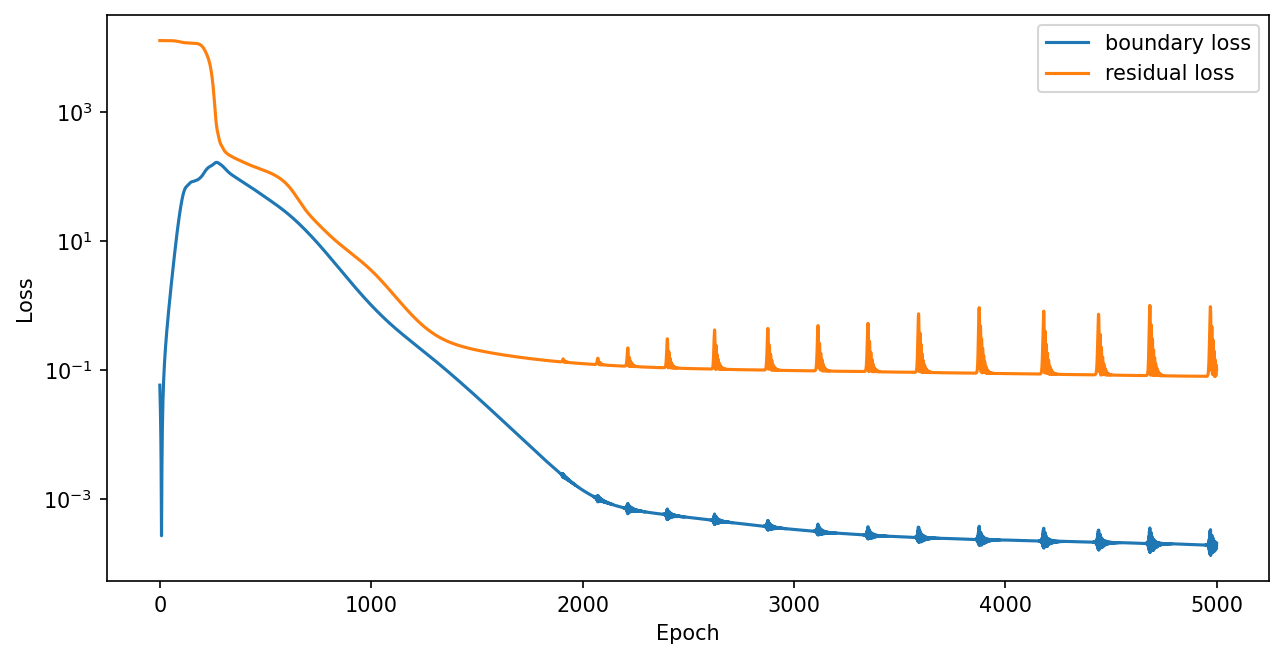

In [25]:
plot_training_loss(history, y_scale = "log")